<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/XGBOOST_FUTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import pandas as pd
import numpy as np

In [140]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

In [141]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [142]:
num = data1.values

In [ ]:
num1 = num/min(num)
num1

In [144]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [145]:
n_steps = 3
# split into samples
X, y = prepare_data(num1, n_steps)

In [ ]:
print(X),print(y)

In [148]:
X = X.reshape((X.shape[0], X.shape[1]))
y = y.reshape(y.shape[0])

In [153]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

In [154]:
xgb_r.fit(X, y)

[11:05:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

In [155]:
y_pred = xgb_r.predict(X)

In [156]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, })
forecast_accuracy(y_pred,y)

{'mae': 0.6810354720454652,
 'mape': 0.08009794609755747,
 'me': 0.00017894574120746537,
 'mpe': 0.03456499804466155,
 'rmse': 0.8564860845417669}

In [157]:
l = []
for i in num1[-3:]:
  for j in i:
    l.append(j)

In [158]:
l

[19.039444538345894, 23.793685671331094, 5.064219693802208]

In [ ]:
x_input = np.array(l)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<20):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape(1,3)
        #print(x_input)
        yhat = xgb_r.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0])
        i=i+1
    else:
        x_input = x_input.reshape(1,3)
        yhat = xgb_r.predict(x_input)
        print(yhat[0])
        temp_input.append(yhat[0])
        lst_output.append(yhat[0])
        i=i+1
    

print(lst_output)

In [159]:
day_new=np.arange(1,50)
day_pred=np.arange(49,69)

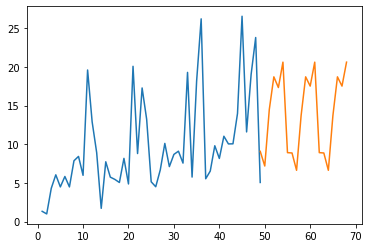

In [160]:
import matplotlib.pyplot as plt
plt.plot(day_new,num1)
plt.plot(day_pred,lst_output)
plt.show()

In [161]:
date = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data = lst_output*min(num)

In [162]:
data3 = pd.DataFrame(date,lst_output*min(num))
data3

,0
1021.910775,2018-02-01
808.237669,2018-03-01
1630.058985,2018-04-01
2103.565408,2018-05-01
1948.114139,2018-06-01
2316.766551,2018-07-01
1002.415071,2018-08-01
997.512227,2018-09-01
746.058523,2018-10-01
1540.268992,2018-11-01
